In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df=pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
df.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

******************************************************************************* 
age: The patient's age in years.
sex: The patient's gender (0 for female, 1 for male).
cp: The type of chest pain experienced by the patient (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
trestbps: The resting blood pressure of the patient in mmHg.
chol: The serum cholesterol level in mg/dL.
fbs: The fasting blood sugar level (> 120 mg/dL represents 1, otherwise 0).
restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy).
thalach: The maximum heart rate achieved.
exang: Exercise-induced angina presence (1 = yes, 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the ST segment during exercise (0 = downsloping, 1 = flat, 2 = upsloping).
ca: Number of major vessels (0-3) colored by fluoroscopy.
thal: Thallium stress test defect (3 = normal, 6 = fixed defect, 7 = reversible defect).
target: Presence of heart disease (0 = absence, 1 = presence).
*******************************************************************************

In [61]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [55]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

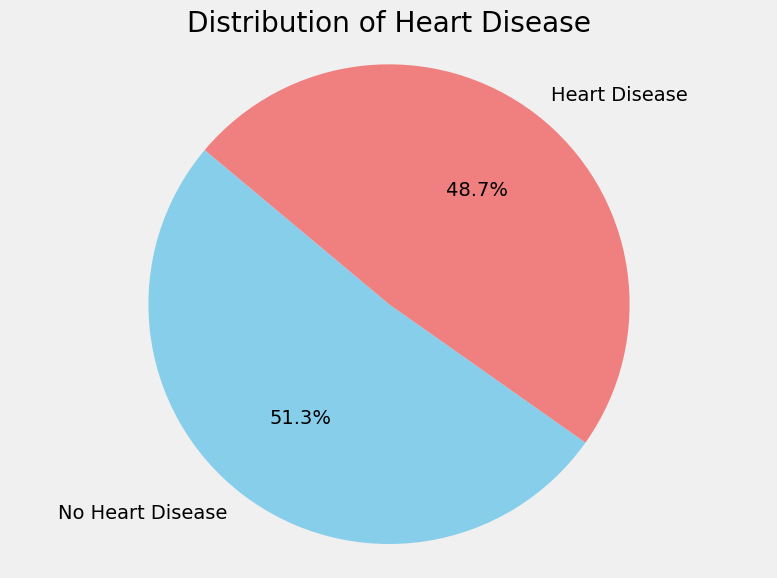

In [56]:
target_counts = df['target'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
sizes = target_counts.values
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease')
plt.axis('equal')  
plt.tight_layout()
plt.show()

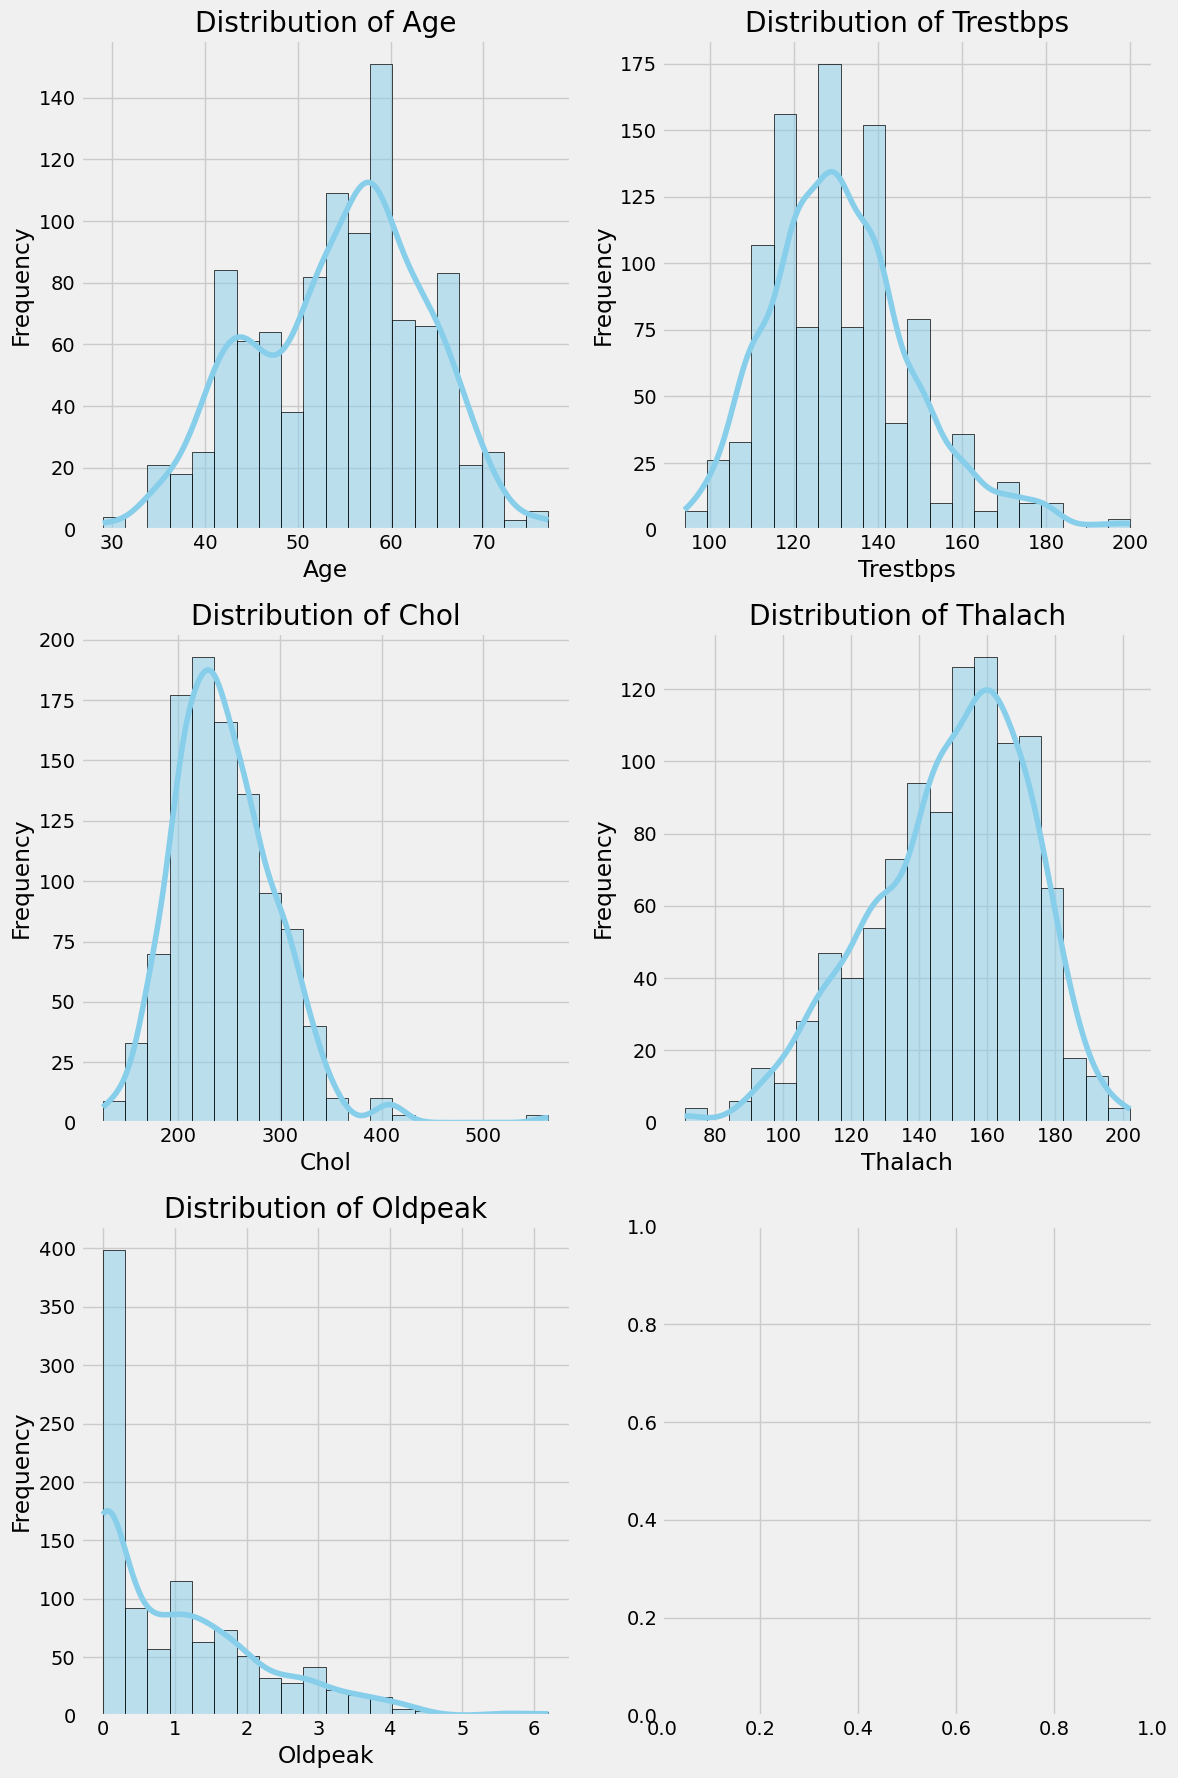

In [60]:
col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

num_rows = len(col) // 2
if len(col) % 2 != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

idx = 0

for i in range(num_rows):
    for j in range(2):
        if idx < len(col):
            sns.histplot(df[col[idx]], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i, j])
            axes[i, j].set_xlabel(col[idx].capitalize())
            axes[i, j].set_ylabel('Frequency')
            axes[i, j].set_title(f'Distribution of {col[idx].capitalize()}')
            idx += 1
plt.tight_layout()



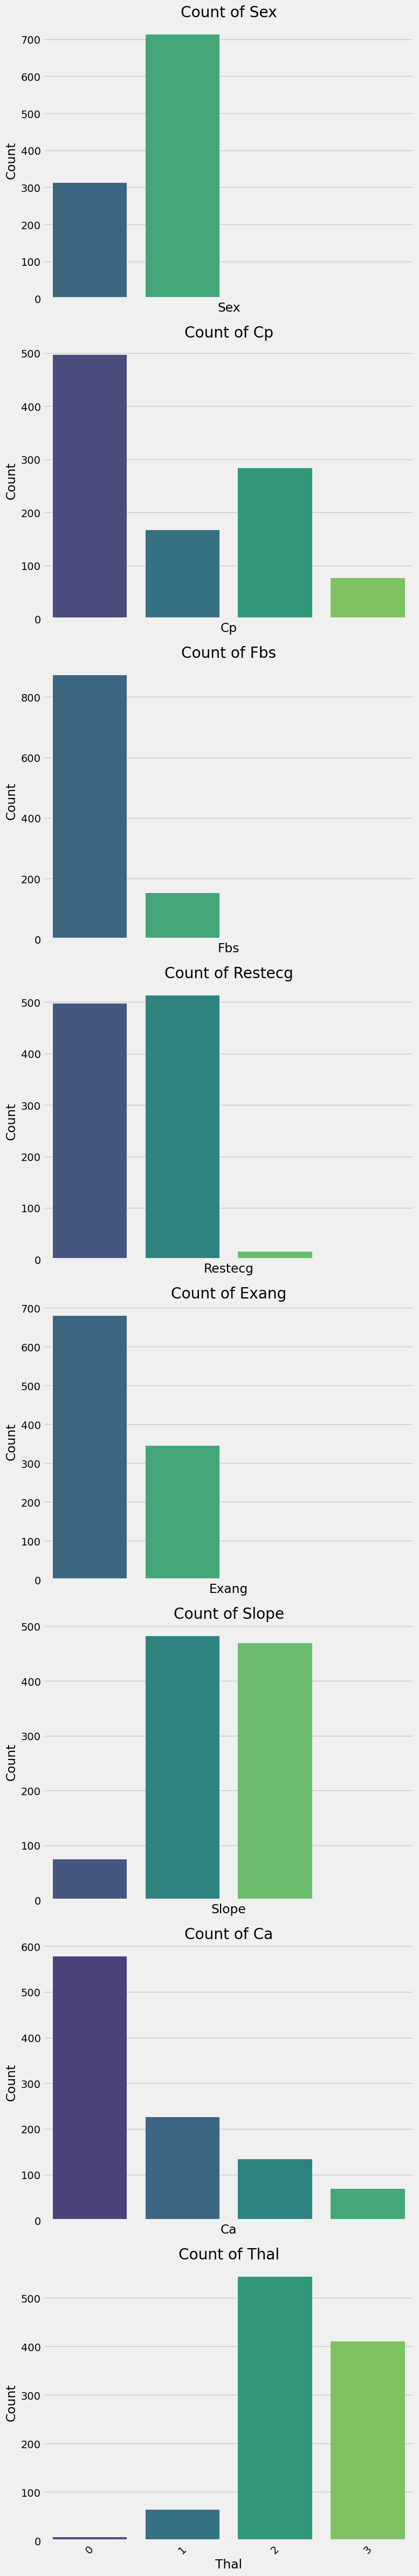

In [113]:
col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
num_rows = len(col)

fig, axes = plt.subplots(num_rows, 1, figsize=(8, 6*num_rows), sharex=True)

for i in range(num_rows):
    sns.countplot(data=df, x=col[i], palette='viridis', ax=axes[i])
    axes[i].set_xlabel(col[i].capitalize())
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count of {col[i].capitalize()}')
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [123]:
X = df.drop('target', axis=1)  
y = df['target']

In [124]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
logreg_model = LogisticRegression(max_iter=1000)


In [118]:
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [119]:
y_pred = logreg_model.predict(X_test)


In [120]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [121]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7951
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



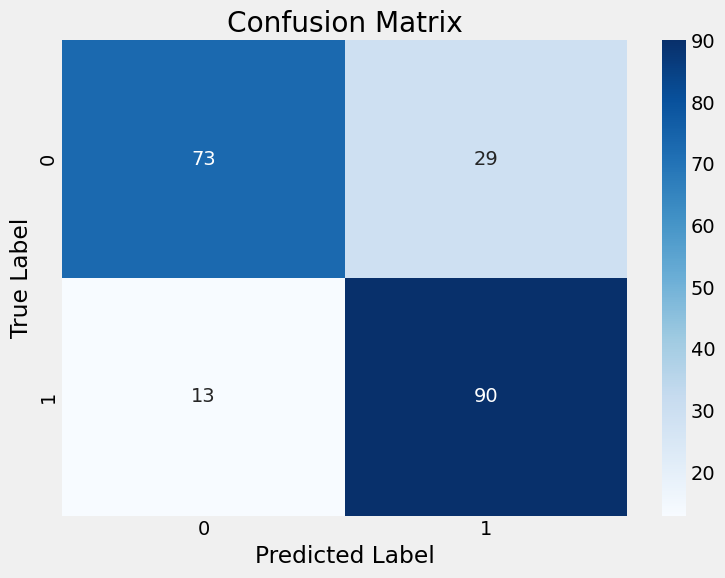

In [122]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [144]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9854
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



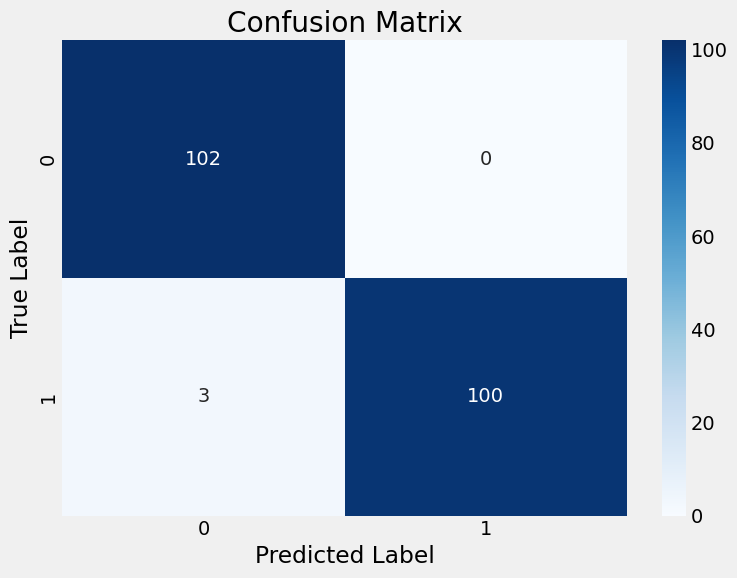

In [145]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()